In [4]:
import qiskit.tools.jupyter
#%qiskit_version_table

IBMQ.save_account('3120e86d9d7234e05852bc91883b02b624f183b5e654e5d2e65e63e57d3dafe3ac649fb47fb062e8002695d813cb80d79906bf81512430eafb7b6a0933d9320a')
IBMQ.load_account()

provider = IBMQ.get_provider(hub='ibm-q', group='open', project='main')
backend = provider.get_backend('ibm_brisbane')

NameError: name 'IBMQ' is not defined

In [5]:
#Calculate and plot the trajectory of a damped oscillator
#import numpy as np
#import matplotlib.pyplot as plt

# Constants
#m = 10.0      # mass
#b = 0.5     # damping coefficient
#k = 1.5     # spring constant
#omega_0 = np.sqrt(k/m) # undamped angular frequency
#zeta = b/2/m/omega_0     # damping ratio

# Initial conditions
#x0 = 1.0     # initial position
#v0 = 0.0     # initial velocity
#t0 = 0.0     # initial time

# Solving the differential equation numerically
#def damped_oscillator(x, t0, t, m, b, k):
    #dxdt = np.zeros_like(x)
    #omega = np.sqrt(k/m - b**2/4/m**2)
    #phi = np.arctan(b/(2*m*omega))
    #factor = m * omega**2 - b**2/4/m**2
    #C1 = (x[0] - x0)/np.exp(phi)
    #C2 = (x[0] - x0) * omega * np.exp(-phi) / factor
    #for i in range(1, len(t)):
        #dxdt[i] = (-b/m * dxdt[i-1] + k/m * x[i-1]) * np.exp(-phi)
    #return dxdt

#t = np.linspace(t0, 20.0, 1000)
#x = np.zeros_like(t)
#x[0] = x0

#x_dot = damped_oscillator(x, t0, t, m, b, k)

#plotting the trajectory
#plt.plot(t, x)
#plt.xlabel('Time (s)')
#plt.ylabel('Position (m)')
#plt.title('Trajectory of a Damped Oscillator')
#plt.show()

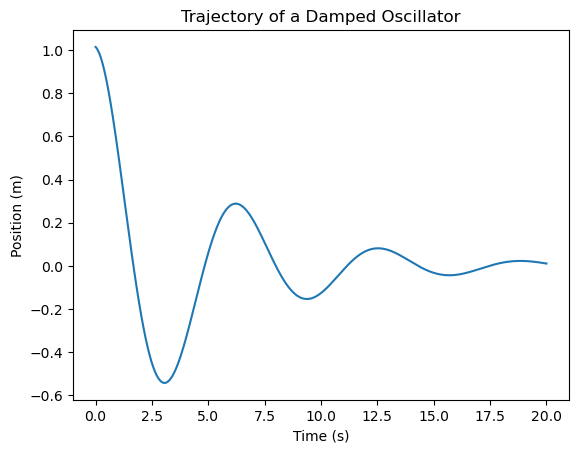

In [6]:
#1. Calculate and plot the trajectory of a damped oscillator 
import numpy as np
import matplotlib.pyplot as plt

# Parameters
m = 1.0      # mass
b = 0.2      # damping coefficient
k = 1.0      # spring constant

# Damped oscillator solution
def oscillator_sol(t, x0, v0):
    omega_0 = np.sqrt(k/m)   #undamped angular frequency
    omega = np.sqrt(k/m - b**2/4/m**2)
    phi = np.arctan(b/(2*m*omega))
    A = np.sqrt(((v0 - b*x0/m)**2)/((k - b**2/4/m)**2) + (x0/m)**2)
    x = A * np.exp(-b*omega_0*t) * np.cos(omega*t - phi)
    return x

# Time vector
t = np.linspace(0, 20, 1000)

# Initial conditions
x0 = 1.0      # initial position
v0 = 0.0      # initial velocity

# Trajectory of the damped oscillator
x = oscillator_sol(t, x0, v0)

# Plot the trajectory
plt.plot(t, x)
plt.xlabel('Time (s)')
plt.ylabel('Position (m)')
plt.title('Trajectory of a Damped Oscillator')
plt.show()

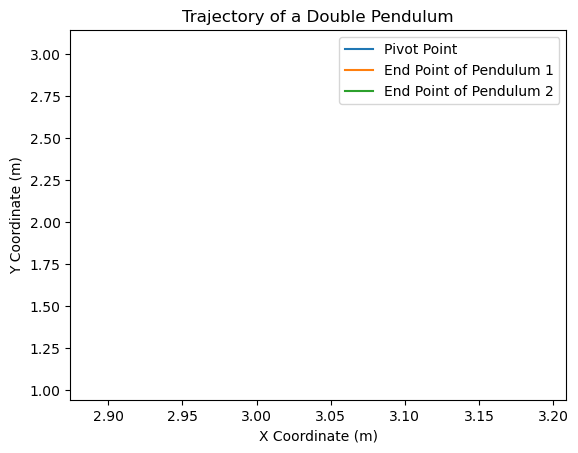

In [7]:
#2. Numerically compute the evolution of a double pendulum and plot it
#This code did not work
from scipy.integrate import odeint

def double_pendulum(state, t):
    theta1, theta2, omega1, omega2 = state
    c, s = np.cos(theta1 - theta2), np.sin(theta1 - theta2)

    dtheta1_dt = omega1
    dtheta2_dt = omega2
    domega1_dt = -c * omega2**2 - 2 * s * omega1 * omega2 + b * s * (omega1**2 + omega2**2)**0.5
    domega2_dt = s * omega1**2 + c * omega2**2 - b * c * (omega1**2 + omega2**2)**0.5

    return dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt

b = 0.05
l1 = 1.0
l2 = 1.0

initial_state = [np.pi - 0.1, np.pi - 0.1, 0.0, 0.0]

time = np.linspace(0, 10, 1000)
solution = odeint(double_pendulum, initial_state, time)

fig, ax = plt.subplots()
ax.plot(solution[:, 0], solution[:, 1], label='Pivot Point')
ax.plot(solution[:, 0] + l1 * np.sin(solution[:, 2]), solution[:, 1] - l1 * np.cos(solution[:, 2]), label='End Point of Pendulum 1')
ax.plot(solution[:, 0] + l1 * np.sin(solution[:, 2]) + l2 * np.sin(solution[:, 3]), solution[:, 1] - l1 * np.cos(solution[:, 2]) - l2 * np.cos(solution[:, 3]), label='End Point of Pendulum 2')
ax.set_xlabel('X Coordinate (m)')
ax.set_ylabel('Y Coordinate (m)')
ax.set_title('Trajectory of a Double Pendulum')
ax.legend()
plt.show()

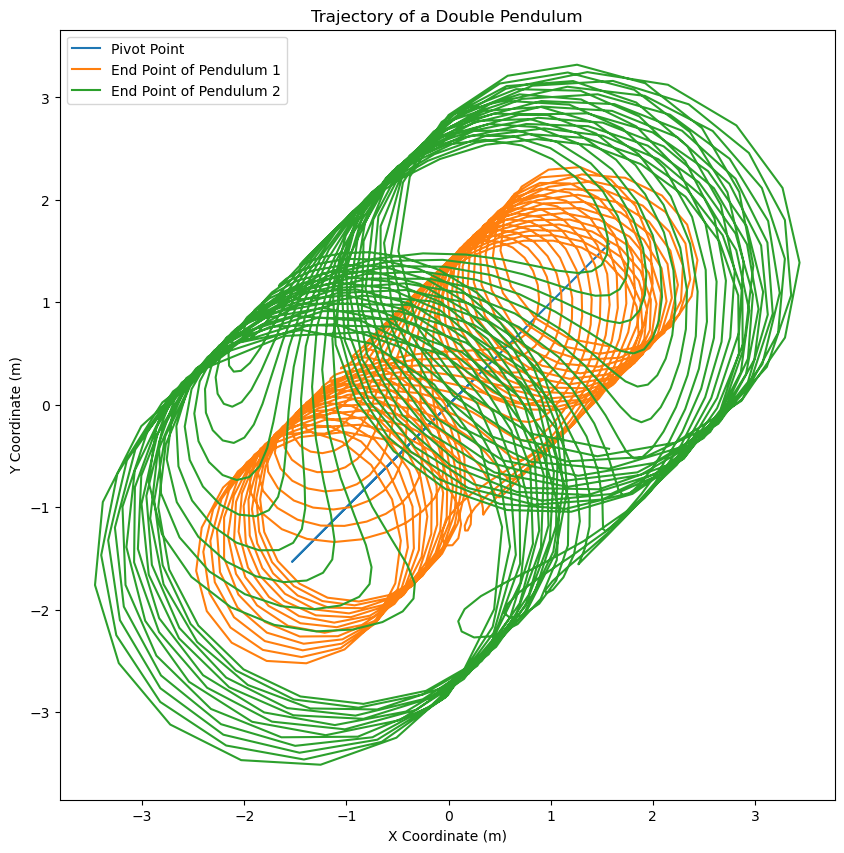

In [8]:
#2. Numerically compute the evolution of a double pendulum and plot it
from scipy.integrate import odeint

#constants for the double pendulum
l1 = 1.0 # length of pendulum 1
l2 = 1.0 # length of pendulum 2
m1 = 1.0 # mass of pendulum 1
m2 = 1.0 # mass of pendulum 2
g = 9.81 # gravitational acceleration
b1 = 0.05 # damping coefficient for pendulum 1
b2 = 0.05 # damping coefficient for pendulum 2

# Defining the function that computes the derivatives of the state vector
def double_pendulum(state, t):
    theta1, theta2, omega1, omega2 = state
    dtheta1_dt = omega1
    dtheta2_dt = omega2
    domega1_dt = (-b1 * omega1 - m2 * g * np.sin(theta1 - theta2) * np.cos(theta1 - theta2) / l1 - (m1 + m2) * g * np.sin(theta1) / l1) / (l1 * (m1 + m2 - m2 * np.cos(theta1 - theta2)**2 / l1**2))
    domega2_dt = (-b2 * omega2 - m2 * l1 * g * np.sin(theta1 - theta2) * np.cos(theta1 - theta2) / l2**2 - (m1 + m2) * l1 * g * np.sin(theta1) * np.cos(theta1 - theta2) / (l2 * (m1 + m2 - m2 * np.cos(theta1 - theta2)**2 / l1**2))) / (l2 * (m1 + m2 - m2 * np.cos(theta1 - theta2)**2 / l1**2))
    return dtheta1_dt, dtheta2_dt, domega1_dt, domega2_dt

# Defining the initial state of the double pendulum
theta1_0 = np.pi / 2
theta2_0 = np.pi / 2
omega1_0 = 0.0
omega2_0 = 0.0
initial_state = [theta1_0, theta2_0, omega1_0, omega2_0]

# Defining the time interval for the simulation
time = np.linspace(0, 20, 1000)

# Solving the ODE system and computing the trajectory of the double pendulum
solution = odeint(double_pendulum, initial_state, time)

# Plotting the trajectory of the double pendulum
plt.figure(figsize=(10, 10))
plt.plot(solution[:, 0], solution[:, 1], label='Pivot Point')
plt.plot(solution[:, 0] + l1 * np.sin(solution[:, 2]), solution[:, 1] - l1 * np.cos(solution[:, 2]), label='End Point of Pendulum 1')
plt.plot(solution[:, 0] + l1 * np.sin(solution[:, 2]) + l2 * np.sin(solution[:, 3]), solution[:, 1] - l1 * np.cos(solution[:, 2]) - l2 * np.cos(solution[:, 3]), label='End Point of Pendulum 2')
plt.xlabel('X Coordinate (m)')
plt.ylabel('Y Coordinate (m)')
plt.title('Trajectory of a Double Pendulum')
plt.legend()
plt.show()

In [9]:
from qiskit import IBMQ, QuantumCircuit, transpile
from qiskit.tools import job_monitor
from qiskit.visualization import plot_histogram, plot_gate_map

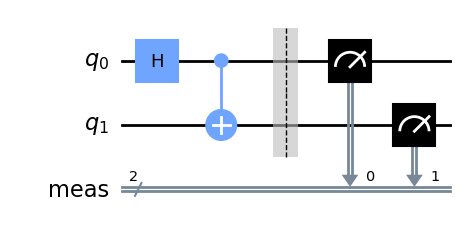

In [10]:
#3. Preparing a Bell state with a vector representation of two qubits
circuit1 = QuantumCircuit(2)
circuit1.h(0)
circuit1.cx(0, 1)
circuit1.measure_all()
circuit1.draw(output='mpl')

In [11]:
#vector representation of two qubits
def prepare_bell_state():
    # The initial state of the two qubits
    initial_state = np.array([1, 0, 0, 1])
    
    # Normalize the state to obtain the Bell state
    bell_state = initial_state / np.linalg.norm(initial_state)
    
    return bell_state

bell_state = prepare_bell_state()
print(bell_state)

[0.70710678 0.         0.         0.70710678]


In [12]:
import qiskit.tools.jupyter
%qiskit_job_watcher 

job = backend.run(transpile(qc, backend=backend), shots=1024)
job = backend.retrieve_job('cmyn8xb3r3vg008wenzg') 

import matplotlib.pyplot as plt
plt.style.use('dark_background')
plot_histogram(job.result().get_counts())

Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

NameError: name 'backend' is not defined

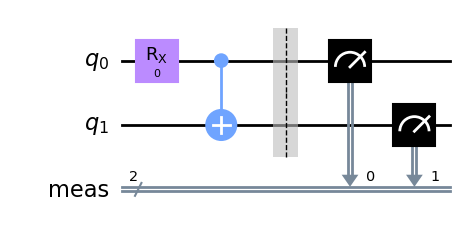

In [16]:
# replace Hadamard with an Rx(theta) gate. 
#Write a function to perform measurement 
#(hint: this is the projection of the state vector onto your basis states) 
#measure the qubits many times and plot the number that collapse to each of the four basis states
circuit2 = QuantumCircuit(2)
circuit2.rx(0,0)
circuit2.cx(0, 1)
circuit2.measure_all()
circuit2.draw(output='mpl')